In [1]:
#Importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: bool = True, labels=None, retbins: bool = False, precision: int = 3, include_lowest: bool = False, duplicates: str = 'raise', ordered: bool = True)
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
    

In [3]:
data = pd.read_csv('C:/Users/Dell/Desktop/Assignments/Decision Trees/Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
#According to the problem statement, we need to create a column for Sales that is categorical in nature
#We can use cut() available in pandas for converting continuous to categorical

In [5]:
data['Sales'].max()

16.27

In [6]:
data['Sales'].min()

0.0

In [7]:
bins = [0,6,12,18]
Sales_labels = ['Low','Medium','High']
data['Sales_categorical'] = pd.cut(data['Sales'], bins, labels = Sales_labels)

In [8]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_categorical
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Medium
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [9]:
first_c = data.pop('Sales_categorical')

In [10]:
data.insert(0,'Sales_categorical',first_c)

In [11]:
data1 = data.drop('Sales',axis=1)
data1.head()

,Sales_categorical,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


In [12]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
data1['Sales_categorical']= label_encoder.fit_transform(data1['Sales_categorical'])

In [13]:
#Complete data encoding for categorical data
data_encoded = pd.get_dummies(data1)

In [14]:
data_encoded.head()

,Sales_categorical,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,2,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,2,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,2,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,1,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [15]:
x=data_encoded.iloc[:,1:]
y=data_encoded['Sales_categorical']

In [16]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [17]:
data_encoded['Sales_categorical'].value_counts()

2    243
1    129
0     27
3      1
Name: Sales_categorical, dtype: int64

In [18]:
#Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Decision tree using Entropy Criteria

In [19]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

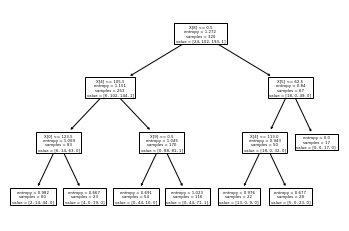

In [20]:
#PLot the decision tree
tree.plot_tree(model);

In [22]:
column_names = list(x.columns)
column_names

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

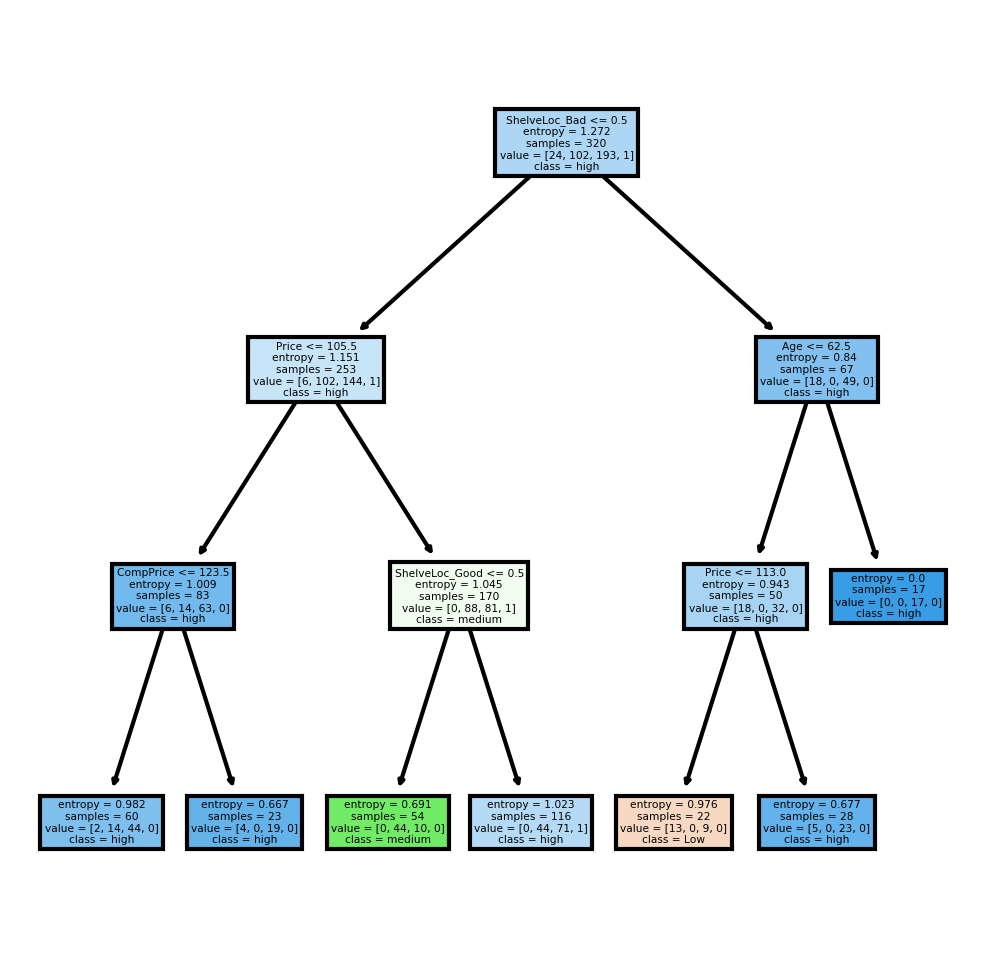

In [23]:
fn=['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Sales_Cat',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']
cn=['Low', 'medium', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);

In [24]:
#Predicting on test data
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

2    69
1     7
0     4
dtype: int64

In [25]:
preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
pd.crosstab(y_test,preds) #2-way table 

col_0,0,1,2
Sales_categorical,,,
0,2,0,1
1,0,5,22
2,2,2,46


In [27]:
# Accuracy 
np.mean(preds==y_test)

0.6625

# CART using Gini Criteria

In [28]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [29]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
#Prediction and computing the accuracy
pred = model.predict(x_test)
np.mean(preds==y_test)

0.6625

# Decision Tree Regression

In [31]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [49]:
array = data1.values
X = array[:,0:3]
y = array[:,3]

In [50]:
X

array([[2, 138, 73],
       [2, 111, 48],
       [2, 113, 35],
       ...,
       [2, 162, 26],
       [1, 100, 79],
       [2, 134, 37]], dtype=object)

In [51]:
Y

array([[2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
       [0],
       [1],
       [1],
       [2],
       [0],
       [2],
       [1],
       [1],
       [2],
       [0],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [1],
       [0],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
    

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [53]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [54]:
#Find the accuracy
model.score(X_test,y_test)

0.9809110629067245